<a href="https://colab.research.google.com/github/pranavkotak8/ML/blob/master/ML_Experiment6_J024_20082020_Pranav_Kotak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aim: Classification using Neural network models

Objectives:

1) Perform classification on bitcoin 2011 dataset

2) Select correct architecture for +75% accuracy on cross validation and test set for bitcoin 2011 dataset - 60%-20%-20% (Train-Crossval-Test split)

3) Plot accuracy vs validation acc and loss vs validation loss during epochs


In [1]:
# Loading the Libraries
import pandas as pd
import numpy as np

In [34]:
# Loading the Datasets
!wget -O 2011gcn.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/2011gcn.csv
!wget -O tx2011partvertices_new.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices_new.csv
!wget -O tx2011partvertices.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices.csv
 
train1 = pd.read_csv('2011gcn.csv')
train2 = pd.read_csv('tx2011partvertices_new.csv')
train3 = pd.read_csv('tx2011partvertices.csv')

--2020-08-31 13:37:26--  https://raw.githubusercontent.com/pranavn91/blockchain/master/2011gcn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12563086 (12M) [text/plain]
Saving to: ‘2011gcn.csv’

2011gcn.csv         100%[===================>]  11.98M  --.-KB/s    in 0.1s    

2020-08-31 13:37:26 (102 MB/s) - ‘2011gcn.csv’ saved [12563086/12563086]

--2020-08-31 13:37:26--  https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices_new.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12501458 (12M) [text/plain]


In [35]:
train1

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0.0,4.811244e+07,0.0,0.0,5.298934e+07,0.0,5.215435e+07,0.0,0.0,4.293262e+05,3.994267e+07,6.251989e+07,0.0,0.0,2.670458e+07,8.313858e+07
1,1,0.0,3.477977e+05,0.0,0.0,3.777575e+05,0.0,3.757520e+05,0.0,0.0,6.889133e+03,3.001618e+05,4.527358e+05,0.0,0.0,1.915057e+05,6.009039e+05
2,2,0.0,6.455196e+07,0.0,0.0,7.110790e+07,0.0,6.997804e+07,0.0,0.0,5.670157e+05,5.356332e+07,8.388026e+07,0.0,0.0,3.583296e+07,1.115463e+08
3,3,0.0,2.009876e+08,0.0,0.0,2.214679e+08,0.0,2.174101e+08,0.0,0.0,1.342720e+06,1.665389e+08,2.614420e+08,0.0,0.0,1.116514e+08,3.472892e+08
4,4,0.0,2.384675e+05,0.0,0.0,2.597246e+05,0.0,2.577884e+05,0.0,0.0,4.202993e+03,2.042845e+05,3.103489e+05,0.0,0.0,1.315073e+05,4.120424e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96493,96493,0.0,1.076483e+09,0.0,0.0,1.186269e+09,0.0,1.167082e+09,0.0,0.0,9.130316e+06,8.922416e+08,1.398730e+09,0.0,0.0,5.976924e+08,1.860175e+09
96494,96494,0.0,3.046724e+09,0.0,0.0,3.357382e+09,0.0,3.303128e+09,0.0,0.0,2.588797e+07,2.525414e+09,3.958776e+09,0.0,0.0,1.691605e+09,5.264773e+09
96495,96495,0.0,7.927045e+08,0.0,0.0,8.734944e+08,0.0,8.594076e+08,0.0,0.0,6.762438e+06,6.571497e+08,1.030010e+09,0.0,0.0,4.401156e+08,1.369801e+09
96496,96496,0.0,1.702268e+09,0.0,0.0,1.875876e+09,0.0,1.845536e+09,0.0,0.0,1.443773e+07,1.410918e+09,2.211843e+09,0.0,0.0,9.451462e+08,2.941539e+09


In [36]:
train2

,Unnamed: 0,txsize,txvirtualsize,txinputs_count,txoutputs_count,txinput_val,txoutput_val,txfee,Min_received,Max_received,Avg_received,Total_received,Stdev_received,Var_received,Min_sent,Max_sent,Avg_sent,Total_sent,Stdev_sent,Var_sent
0,1,7369,7369,5,190,2.150000e+08,2.146000e+08,400000,0.000500,1.000000,0.011295,2.146000,0.081163,0.006587,0.00050,1.670000,0.430000,2.150000,0.703445,0.494835
1,2,293,293,1,3,4.400000e+06,4.350000e+06,50000,0.001000,0.041500,0.014500,0.043500,0.023383,0.000547,0.04400,0.044000,0.044000,0.044000,0.000000,0.000000
2,3,11139,11139,1,322,1.250000e+08,1.244000e+08,600000,0.001000,0.446000,0.003863,1.244000,0.024941,0.000622,1.25000,1.250000,1.250000,1.250000,0.000000,0.000000
3,4,495,495,1,9,2.745000e+07,2.740000e+07,50000,0.001000,0.266000,0.030444,0.274000,0.088333,0.007803,0.27450,0.274500,0.274500,0.274500,0.000000,0.000000
4,5,462,462,1,8,3.000000e+06,2.950000e+06,50000,0.001000,0.022500,0.003687,0.029500,0.007601,0.000058,0.03000,0.030000,0.030000,0.030000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96493,96494,945,945,5,1,1.503100e+10,1.503100e+10,0,150.310000,150.310000,150.310000,150.310000,0.000000,0.000000,0.05000,141.870000,30.062000,150.310000,62.545916,3911.991570
96494,96495,2024,2024,11,1,5.000000e+10,5.000000e+10,30,500.000000,500.000000,500.000000,500.000000,0.000000,0.000000,0.01000,295.528446,45.454545,500.000000,93.913261,8819.700576
96495,96496,258,258,1,2,9.799500e+09,9.799000e+09,500000,1.000000,96.990000,48.995000,97.990000,67.875180,4607.040050,97.99500,97.995000,97.995000,97.995000,0.000000,0.000000
96496,96497,800,800,4,2,2.123400e+10,2.123400e+10,0,3.340045,209.000000,106.170022,424.680090,118.737830,14098.672390,0.30686,209.943296,53.085011,424.680090,96.815592,9373.258916


In [37]:
train3

,Unnamed: 0,label
0,1,unclassified
1,2,donations
2,3,unclassified
3,4,donations
4,5,donations
...,...,...
96493,96494,donations
96494,96495,donations
96495,96496,donations
96496,96497,exchange


In [38]:
# Dropping the Redundant Column Unnamed:0
train1.drop(columns={'Unnamed: 0'},inplace=True)
train2.drop(columns={'Unnamed: 0'},inplace=True)
train3.drop(columns={'Unnamed: 0'},inplace=True)

In [39]:
# split data into X and Y1 --[Taking here train1 dataset into consideration]
X = train1
Y1 = train3

In [52]:
# Scaling the Data
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()
X=s.fit_transform(X)

In [55]:
# Viewing the Dataset
X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,3.552501e-05,0.0,0.0,3.547729e-05,0.0,3.541943e-05,0.0,0.0,3.855259e-05,3.596728e-05,3.567575e-05,0.0,0.0,3.539382e-05,3.553478e-05
1,0.0,2.568050e-07,0.0,0.0,2.524478e-07,0.0,2.551834e-07,0.0,0.0,6.186298e-07,2.626867e-07,2.562033e-07,0.0,0.0,2.538186e-07,2.496562e-07
2,0.0,4.766353e-05,0.0,0.0,4.760814e-05,0.0,4.752398e-05,0.0,0.0,5.091682e-05,4.823492e-05,4.786536e-05,0.0,0.0,4.749242e-05,4.767918e-05
3,0.0,1.484041e-04,0.0,0.0,1.482782e-04,0.0,1.476491e-04,0.0,0.0,1.205734e-04,1.499880e-04,1.491936e-04,0.0,0.0,1.479809e-04,1.484600e-04
4,0.0,1.760784e-07,0.0,0.0,1.734217e-07,0.0,1.750710e-07,0.0,0.0,3.774199e-07,1.763335e-07,1.749481e-07,0.0,0.0,1.742977e-07,1.689173e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96493,0.0,7.948475e-04,0.0,0.0,7.942379e-04,0.0,7.925968e-04,0.0,0.0,8.198833e-04,8.036025e-04,7.982039e-04,0.0,0.0,7.921717e-04,7.952235e-04
96494,0.0,2.249624e-03,0.0,0.0,2.247856e-03,0.0,2.243243e-03,0.0,0.0,2.324686e-03,2.274543e-03,2.259132e-03,0.0,0.0,2.242026e-03,2.250700e-03
96495,0.0,5.853129e-04,0.0,0.0,5.848271e-04,0.0,5.836469e-04,0.0,0.0,6.072528e-04,5.918636e-04,5.877881e-04,0.0,0.0,5.833221e-04,5.855872e-04
96496,0.0,1.256911e-03,0.0,0.0,1.255948e-03,0.0,1.253353e-03,0.0,0.0,1.296478e-03,1.270756e-03,1.262219e-03,0.0,0.0,1.252681e-03,1.257510e-03


In [56]:
# Splitting the Dataset into Trainingset and Testing Set in the ratio 80:20
from sklearn.model_selection import train_test_split
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size=0.2, random_state=seed)

In [57]:
# Checking the y_train values
y_train

,label
20831,donations
47256,donations
76850,donations
17128,donations
78663,donations
...,...
53459,donations
10742,donations
49689,donations
58564,donations


In [58]:
# One hot encoding the target variables as it is the requirement of Neural Network
y_train=pd.get_dummies(y_train)
y_test=pd.get_dummies(y_test)

In [59]:
y_train

,label_donations,label_exchange,label_mixer,label_paymentgateway,label_unclassified,label_wallets
20831,1,0,0,0,0,0
47256,1,0,0,0,0,0
76850,1,0,0,0,0,0
17128,1,0,0,0,0,0
78663,1,0,0,0,0,0
...,...,...,...,...,...,...
53459,1,0,0,0,0,0
10742,1,0,0,0,0,0
49689,1,0,0,0,0,0
58564,1,0,0,0,0,0


In [60]:
# Importing the Necessary Libraries for Neural Networks
from keras import Sequential
from keras.layers import LeakyReLU
from keras.layers import Dense
import tensorflow
from keras.utils import to_categorical

In [61]:
X_train.shape

(77198, 16)

In [62]:
y_train.shape

(77198, 6)

In [66]:
# Performing Neural Network on X_train and Y_train
model=Sequential()
model.add(Dense(units=104, activation='relu', input_dim=16))
model.add(Dense(units=280, activation='relu'))
model.add(Dense(units=1041, activation='relu'))
model.add(Dense(units=6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history1=model.fit(X_train, y_train, epochs=100,validation_split=0.2, verbose=1,batch_size=128)

Epoch 1/100
483/483 [==============================] - 3s 6ms/step - loss: 0.6556 - accuracy: 0.8370 - val_loss: 0.6186 - val_accuracy: 0.8389
Epoch 2/100
483/483 [==============================] - 3s 5ms/step - loss: 0.6150 - accuracy: 0.8397 - val_loss: 0.6137 - val_accuracy: 0.8391
Epoch 3/100
483/483 [==============================] - 3s 5ms/step - loss: 0.5966 - accuracy: 0.8404 - val_loss: 0.5963 - val_accuracy: 0.8575
Epoch 4/100
483/483 [==============================] - 3s 5ms/step - loss: 0.5720 - accuracy: 0.8529 - val_loss: 0.5502 - val_accuracy: 0.8678
Epoch 5/100
483/483 [==============================] - 2s 5ms/step - loss: 0.5640 - accuracy: 0.8601 - val_loss: 0.5510 - val_accuracy: 0.8674
Epoch 6/100
483/483 [==============================] - 2s 5ms/step - loss: 0.5447 - accuracy: 0.8684 - val_loss: 0.5425 - val_accuracy: 0.8685
Epoch 7/100
483/483 [==============================] - 2s 5ms/step - loss: 0.5531 - accuracy: 0.8647 - val_loss: 0.5496 - val_accuracy: 0.8677

In [67]:
# Evaluating the Model
model.evaluate(X_test,y_test)

604/604 [==============================] - 2s 3ms/step - loss: 0.5261 - accuracy: 0.8691


[0.5260659456253052, 0.8691191673278809]

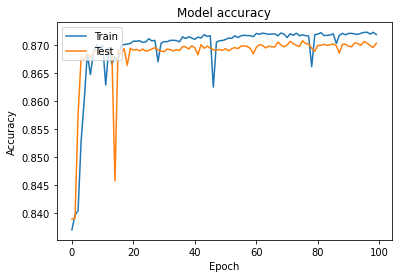

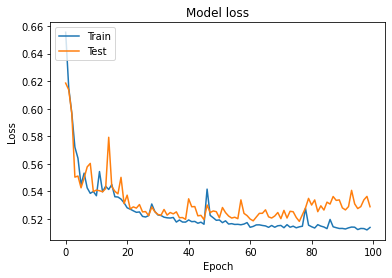

In [68]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Taking the next dataset train2

In [74]:
# Scaling the dataset train2
X2=train2
X2=pd.DataFrame(s.fit_transform(X2))

In [75]:
# Splitting the Dataset into trainset and testset
from sklearn.model_selection import train_test_split
seed = 7
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, Y1, test_size=0.2, random_state=seed)

In [76]:
# One Hot encoding which is necessary for Neural Network target variable.
y_train1=pd.get_dummies(y_train1)
y_test1=pd.get_dummies(y_test1)

In [77]:
y_train1.shape

(77198, 6)

In [78]:
X_train1.shape

(77198, 19)

In [80]:
# Building the Neural Network Model
model1=Sequential()
model1.add(Dense(units=104, activation='relu', input_dim=19))
model1.add(Dense(units=280, activation='relu'))
model1.add(Dense(units=2800, activation='tanh'))
model1.add(Dense(units=1041, activation='relu'))
model1.add(Dense(units=1800, activation='tanh'))
model1.add(Dense(units=6, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history=model1.fit(X_train1, y_train1, epochs=100,validation_split=0.2, verbose=1,batch_size=128)

Epoch 1/100
483/483 [==============================] - 6s 12ms/step - loss: 0.6538 - accuracy: 0.8307 - val_loss: 0.6250 - val_accuracy: 0.8337
Epoch 2/100
483/483 [==============================] - 6s 12ms/step - loss: 0.6227 - accuracy: 0.8343 - val_loss: 0.6343 - val_accuracy: 0.8362
Epoch 3/100
483/483 [==============================] - 6s 12ms/step - loss: 0.6133 - accuracy: 0.8318 - val_loss: 0.5994 - val_accuracy: 0.8337
Epoch 4/100
483/483 [==============================] - 6s 11ms/step - loss: 0.5815 - accuracy: 0.8402 - val_loss: 0.5797 - val_accuracy: 0.8332
Epoch 5/100
483/483 [==============================] - 6s 12ms/step - loss: 0.5474 - accuracy: 0.8590 - val_loss: 0.6285 - val_accuracy: 0.8490
Epoch 6/100
483/483 [==============================] - 6s 11ms/step - loss: 0.5333 - accuracy: 0.8643 - val_loss: 0.5513 - val_accuracy: 0.8694
Epoch 7/100
483/483 [==============================] - 6s 12ms/step - loss: 0.5264 - accuracy: 0.8664 - val_loss: 0.5302 - val_accuracy:

In [81]:
# Evaluating the Model on test set
model1.evaluate(X_test1,y_test1)

604/604 [==============================] - 2s 3ms/step - loss: 0.4575 - accuracy: 0.8747


[0.45745331048965454, 0.8747150301933289]

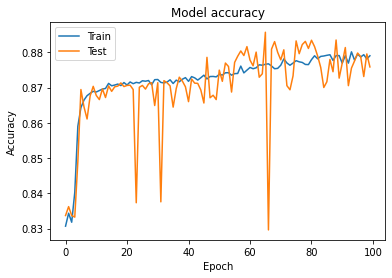

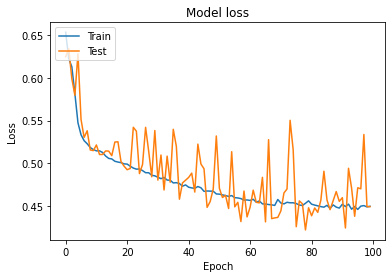

In [82]:
import matplotlib.pyplot as plt
# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()